In [132]:
import matplotlib.pyplot as plt 
import numpy as np
from util.functions import get_data_ticker, dias_uteis_entre_datas, decompor_sinal
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
import yfinance as yf
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [115]:
# Define as constantes
EMPRESA = 'PETR4.SA'
SEED = 42
periodo = '5y'
janela_movel = 1

## Obter dados

In [116]:
dados_historicos = get_data_ticker(EMPRESA, period='5y')
dados_historicos.dropna(inplace=True)

[*********************100%%**********************]  1 of 1 completed


In [117]:

# Separa os dados em características e variável alvo
caracteristicas = dados_historicos.drop('tomorrow', axis=1)
alvo = dados_historicos['tomorrow']

In [128]:

# Divide os dados em conjuntos de treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(caracteristicas, alvo, test_size = 0.20, random_state=42)

# Cria o modelo Random Forest
modelo = RandomForestRegressor(n_estimators=100, random_state=42)
y_treino = y_treino.dropna()


In [119]:
# Treina o modelo
modelo.fit(X_treino, y_treino)

# Faz previsões no conjunto de teste
previsoes = modelo.predict(X_teste)

In [137]:
# Calculando métricas de avaliação
mse = mean_squared_error(y_teste, previsoes)
r2 = r2_score(y_teste, previsoes)
print('MSE:', mse)
print('R²:', r2)

MSE: 0.7066616764622276
R²: 0.97711131743048


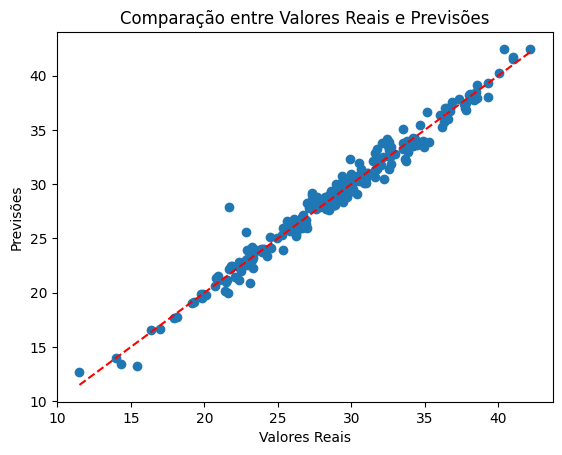

In [139]:
plt.scatter(y_teste, previsoes)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Comparação entre Valores Reais e Previsões')
plt.plot([min(y_teste), max(y_teste)], [min(y_teste), max(y_teste)], color='red', linestyle='--')
plt.show()

In [138]:
# Definindo os hiperparâmetros a serem ajustados
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Criando o modelo base
rf = RandomForestRegressor(random_state=42)

# Criando o objeto GridSearchCV
grid_search = GridSearchCV(estimator=rf, 
                          param_grid=param_grid,
                          cv=5,  # Número de folds na validação cruzada
                          n_jobs=-1,  # Utilizando todos os núcleos da CPU
                          verbose=2)

# Realizando a busca pelos melhores hiperparâmetros
grid_search.fit(X_treino, y_treino)

# Obtendo os melhores parâmetros
best_params = grid_search.best_params_
print(best_params)

# Criando o modelo com os melhores parâmetros
best_model = grid_search.best_estimator_

# Fazendo previsões com o melhor modelo
best_predictions = best_model.predict(X_teste)

# Calculando as métricas de avaliação
best_mse = mean_squared_error(y_teste, best_predictions)
best_r2 = r2_score(y_teste, best_predictions)
print('Melhor MSE:', best_mse)
print('Melhor R²:', best_r2)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Melhor MSE: 0.6602948956573941
Melhor R²: 0.9786131316125161


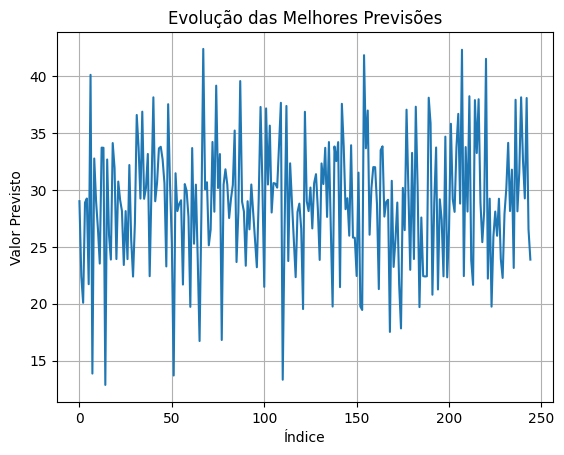

In [142]:
plt.plot(best_predictions)
plt.xlabel('Índice')
plt.ylabel('Valor Previsto')
plt.title('Evolução das Melhores Previsões')
plt.grid(True)
plt.show()

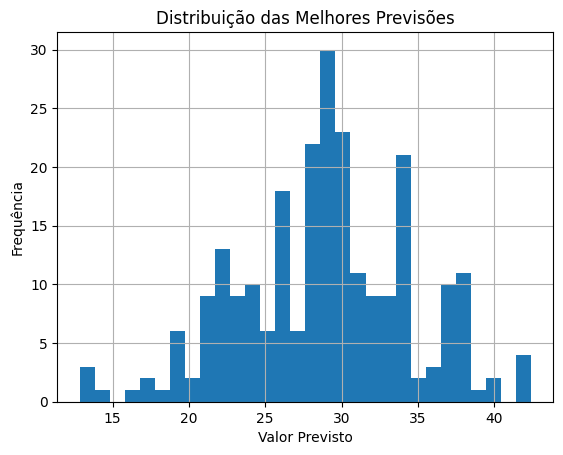

In [144]:
import matplotlib.pyplot as plt

plt.hist(best_predictions, bins=30)
plt.xlabel('Valor Previsto')
plt.ylabel('Frequência')
plt.title('Distribuição das Melhores Previsões')
plt.grid(True)
plt.show()

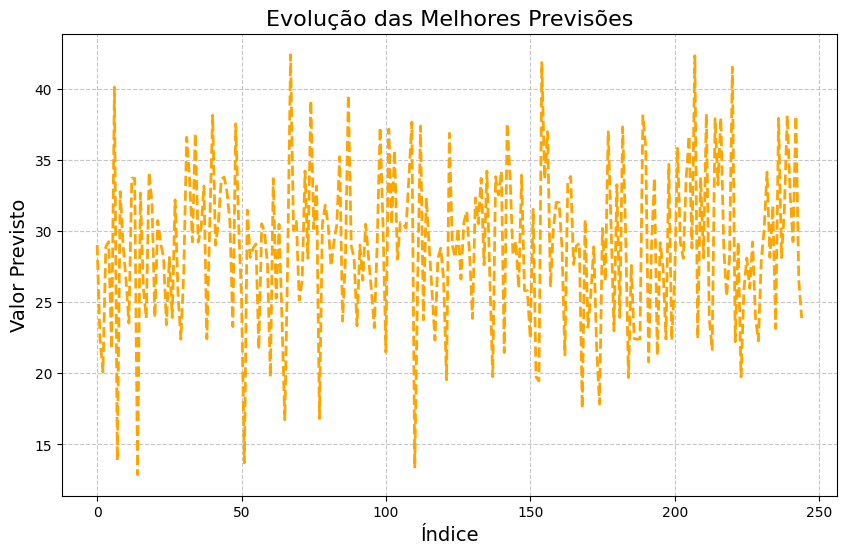